# View the dataset

In [1]:
# importation
import numpy as np
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt
%matplotlib inline
# local
from FBResNet.myfunc import Physics
from FBResNet.main import FBRestNet
from FBResNet.model import MyModel
from FBResNet.posttreat import Export_Data

### Paramètres 

In [2]:
nx = 2000
m  = 500
exp1 = FBRestNet(experimentation=Physics(nx,m,1,1), nb_blocks=20, noise = 0.1,\
                 folder = './', im_set="Set1",batch_size=[300,1],\
                 lr=1e-3, nb_epochs=[20,1])

# Create the dataset

In [3]:
train_set, val_set = exp1.CreateDataSet()

In [4]:
import pandas as pd

In [5]:
folder = './Datasets/Signals'

In [6]:
dfl  = pd.read_csv(folder+'/'+'data_l_trsf_a1_cube.csv', sep=',',header=None)
dfle = pd.read_csv(folder+'/'+'data_l_a1_cube.csv', sep=',',header=None)
dfb  = pd.read_csv(folder+'/'+'data_b_a1_cube.csv', sep=',',header=None)
dfbn = pd.read_csv(folder+'/'+'data_bn_a1_cube.csv', sep=',',header=None)

In [7]:
fl = np.array(dfl)
fle = np.array(dfle)
fb = np.array(dfb)
fbn = np.array(dfbn)

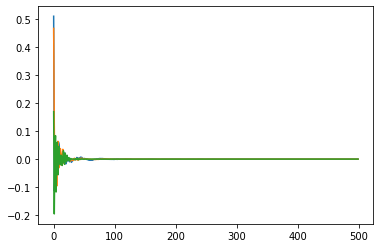

In [8]:
t = np.linspace(0,m-1,m)
plt.plot(t,fl[1])
plt.plot(t,fl[16])
plt.plot(t,fl[25])

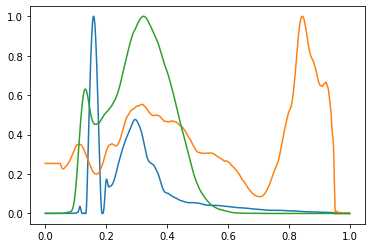

In [9]:
te = np.linspace(0,1,nx)
plt.plot(te,exp1.physics.BasisChangeInv(fl[12]))
plt.plot(te,exp1.physics.BasisChangeInv(fl[30]))
plt.plot(te,exp1.physics.BasisChangeInv(fl[252]))

In [10]:
from scipy.interpolate import interp1d
# interpolation
def reduce(f,n1,n2):
    t      = np.linspace(0,1,n1, endpoint=True)
    te     = np.linspace(0,1,n2,endpoint=True)
    g      = interp1d(t,f)
    f_red  = g(te)
    return f_red

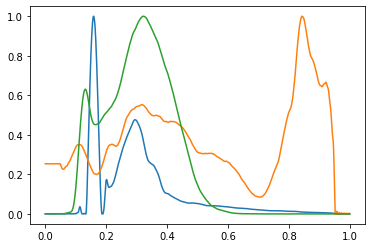

In [11]:
te = np.linspace(0,1,nx)
plt.plot(te,fle[12])
plt.plot(te,fle[30])
plt.plot(te,fle[252])

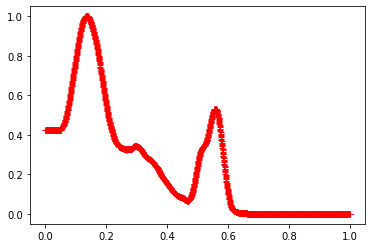

In [12]:
plt.plot(te,fle[15])
plt.plot(te,exp1.physics.BasisChangeInv(fl[15]),'r+')

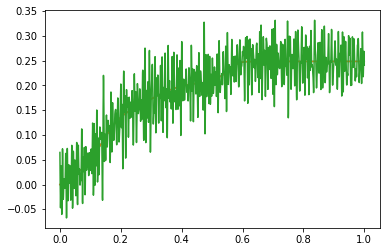

In [13]:
plt.plot(te,exp1.physics.Compute(fle[15]))
plt.plot(te,fb[15])
plt.plot(te,fbn[15])

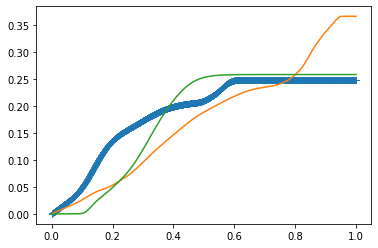

In [14]:
plt.plot(te,fb[15],'+')
plt.plot(te,fb[30])
plt.plot(te,fb[252])

In [15]:
np.linalg.norm(fb[1])

14.577377522790135

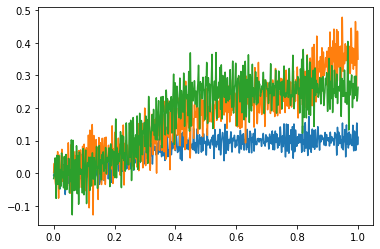

In [16]:
plt.plot(te,fbn[12])
plt.plot(te,fbn[30])
plt.plot(te,fbn[252])

In [17]:
np.linalg.norm(fbn[1]-fb[1])/np.linalg.norm(fb[1])

0.1669567043729785

In [18]:
np.sqrt(nx)

44.721359549995796

In [19]:
n2 = 500
tr = np.linspace(0,1,n2)

In [20]:
folder = './Redaction/data'
Export_Data(t,fl[15],folder,'l_eig_0')
Export_Data(t,fl[24],folder,'l_eig_1')
Export_Data(t,fl[30],folder,'l_eig_2')

In [21]:
folder = './Redaction/data'
Export_Data(tr,reduce(fle[15],nx,n2),folder,'l_elt_0')
Export_Data(tr,reduce(fle[24],nx,n2),folder,'l_elt_1')
Export_Data(tr,reduce(fle[30],nx,n2),folder,'l_elt_2')

In [22]:
folder = './Redaction/data'
Export_Data(tr,reduce(fb[15],nx,n2),folder,'b_elt_0')
Export_Data(tr,reduce(fb[24],nx,n2),folder,'b_elt_1')
Export_Data(tr,reduce(fb[30],nx,n2),folder,'b_elt_2')

In [23]:
folder = './Redaction/data'
Export_Data(tr,reduce(fbn[15],nx,n2),folder,'bn_elt_0')
Export_Data(tr,reduce(fbn[24],nx,n2),folder,'bn_elt_1')
Export_Data(tr,reduce(fbn[30],nx,n2),folder,'bn_elt_2')